# CREDIT CARD FRAUD DETECTION

TODAY GENERATION IS ONLINE ERA. IN THE ERA OF ONLINE MOST OF ALL THE TRANSCATION ARE DONE IN INTERNET.SO E-COMMERSE FRAUDLENT TRANSCATIUON HAS BEEN INCREASEDAND BECAME A MAJOR PROBLEM, ALL THE TRANSCATION CAN EASILY BE COIMPLETED ONLINE BY ENTERING THE CERDIT CARD DETAILS.ORGANIZATIONS,CONSUMERS,BANKS AND MERCHANT ARE PUT AT RISK WHEN THE DATA BREACH LEADS TO MONET THEFT ALONG WITH COMPANY'S REPUTATION.

   SO MACHINE LEARNING PLAYS A KEY ROLE IN THE DETECTION OF CERDIT CRAD FRAUD IN ONLINE TRANSCATION.CREDIT CARD FRAUD DETECTION IS CHALLENGING,BECAUSE THE PROFILE OF PERSONS BEHAVIOUR CHANGES CONSTANTLY AND CREDIT CARD FRAUD DATA SETS ARE HIGH SKEWED. FOR PREDICTING THESE TRANSCATION BANKS MAKE USE OF VARIOUS MACHINE LEARNING METHODLOGIES,PAST DATA HAS BEEN COLLECTED AND NEW FEATURES ARE BEEN USED FOR PREDICITING. THE PERFORMANCE OF FRAUD DETECTING IN CREDIT CARD TRANSCATION IS GREATLY AFFECTED BY SAMPLING DATA SET,SELECTION OF VARIABLES AND DETECTION TECHNIQUES USED. IN THIS NOTEBOOK OR PAGE WE HAVE BEEN USED THE RANDOM FOREST AND LOGISTIC REGRESSION FOR CREDIT CARD FRAUD DETECTION.
   
   
   ALGORITHM STEPS:
   
   Step1: READ THE DATASET.
   Step2: RANDOM SAMPLING IS DONE ON THE THE DATA SET TO MAKE BALANCED.        
   Step3:DIVIDE THE DATASET INTO TRAIN DATASET AND TEST DATASET.            
   Step4: DATA IS SCALRD.           
   Step5:ACCURACY AND PERFORMANCE METRICS HAS BEEN CALCULATED.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("C:/Users/tejes/Downloads/machine1/creditcard.csv")

# CHECKING FOR NULL VALUES

In [3]:
dataset.shape
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# DATASET  HEADINGS

In [22]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
pd.value_counts(dataset["Class"])

0    284315
1       492
Name: Class, dtype: int64

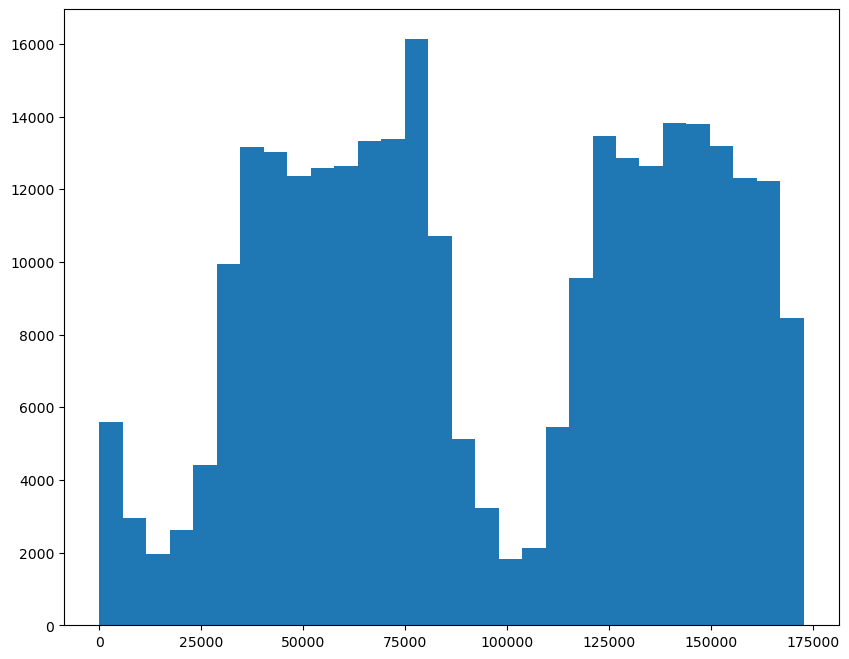

In [25]:
plt.figure(figsize=(10,8))
plt.hist(dataset.Time,bins=30)
plt.show()

THIS GRAPH SHOWS THE TIMES AT WHICH TRANSCATION WERE DONE WITHIN THE TWO DAYS. IT CAN BE SEEN THAT MOST OF THE TRANSCATIONS WERE MADE DURING THE DAYTIME.

<Axes: ylabel='count'>

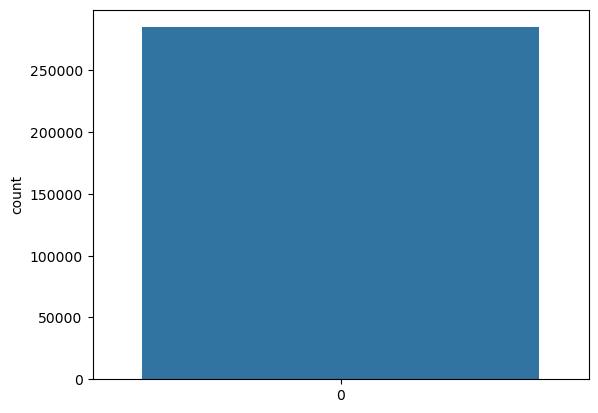

In [6]:
sns.countplot(dataset['Class'])

<Axes: xlabel='Time', ylabel='Count'>

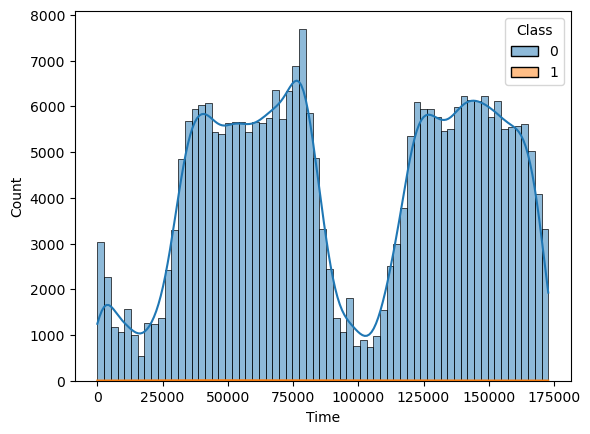

In [26]:
sns.histplot(data=dataset,x='Time',kde=True,hue='Class')

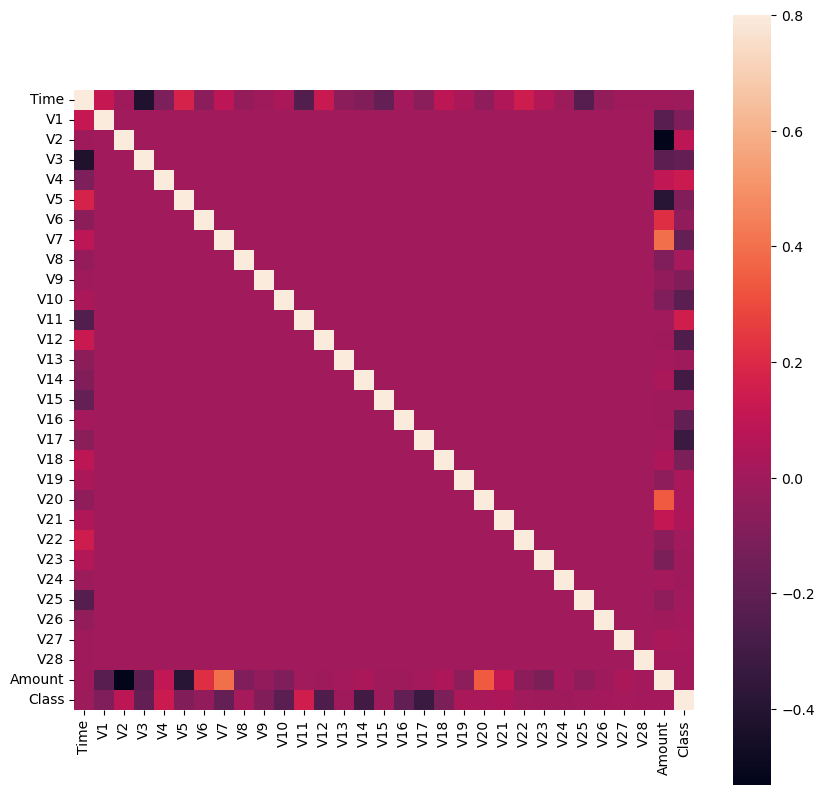

In [7]:
corrmatrix = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmatrix , vmax=0.8 , square=True)
plt.show()

In [8]:
len(dataset[dataset["Class"]==0]) #valid transcation

284315

In [9]:
len(dataset[dataset['Class']==1])    #invalid transcation

492

# Taking the MACHINE LEARNING MODEL RANDOM FOREST

In [10]:
X = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values
#convert imbalanced data to balanced data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_res , y_res = ros.fit_resample(X,y)
print(X.shape)
print(X_res.shape)

(284807, 30)
(568630, 30)


# DIVIDING THE DATASET INTO TRAIN SET AND PREDECTING SET

In [11]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X_res , y_res , test_size=0.4 , random_state=42)
print(x_train.shape)
print(y_train.shape)

(341178, 30)
(341178,)


In [12]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 641 , random_state=0)
classifier.fit(x_train , y_train)
y_pred = classifier.predict(x_test)

# FINDING THE CONFUSION MATRIX

0.9999560346798445


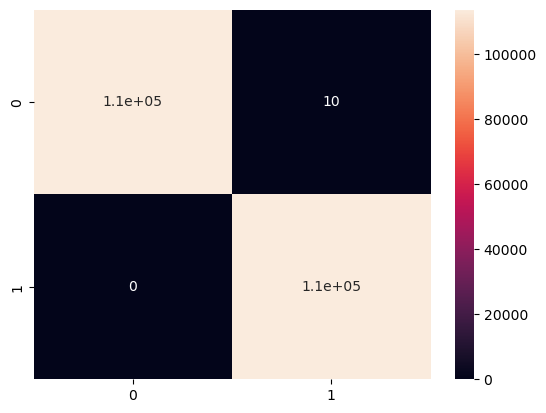

In [13]:
from sklearn.metrics import confusion_matrix , accuracy_score
conm = confusion_matrix(y_test , y_pred)
sns.heatmap(conm , annot=True)
print(accuracy_score(y_test , y_pred))

# FINDING THE ACCURACY OF RANDOM FOREST MODEL

In [14]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9999560346798445


# TAKING ANOTHER MODEL LOGISTIC REGRESSION

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [17]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [19]:
y_pred = classifier.predict(X_test)

Accuracy Score: 0.999204147794436

Confusion Matrix:
 [[85284    12]
 [   56    91]]
0.999204147794436


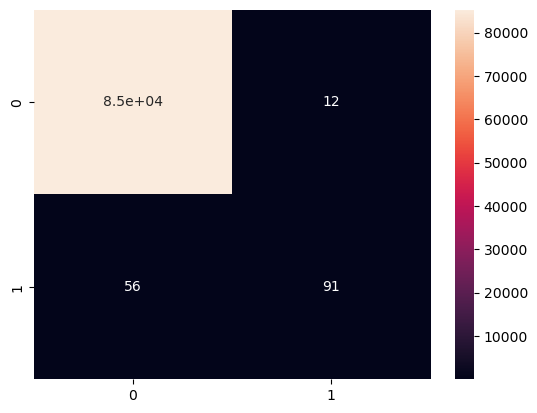

In [21]:
# Evaluating the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
from sklearn.metrics import confusion_matrix , accuracy_score
conm = confusion_matrix(y_test , y_pred)
sns.heatmap(conm , annot=True)
print(accuracy_score(y_test , y_pred))

# SO AS OF NOW RANDOM FOREST IS BEST FOR THE CREDIT CARD FRAUD DETECTION

RANDOM FOREST ACCURACY IS BETTER THEN THE LOGISTIC REGRESSION . SO MODEL WITH RANDOM FOREST IS BEST TO USE FOR THE CREDIT CRAD FRUAD DETECTION.

# CONCLUSION

SO FAR WE HAVE TRAINED THE MODEL WITH DIFFERENT ALGORITHMS. WHILE WE COULDN'T REACH OUT THE GOAL 100% ACCURACY IN DETECTION. IN THIS PAGE WE HAVE USE THE LOGISTIC REGRESSION,RANDOM FOREST WERE USED TO DETECT THE FRAUD IN CREDIT CARD SYSTEM. BY COMPARING ALL THE METHODS, FOUND THAT RANDOM FOREST IS BETTER THEN THE LOGISTIC REGRESSION ....